In [1]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random

In [2]:
# Load the training and testing data
# cifar=tf.keras.datasets.cifar10
# (xtrain,ytrain),(xtest,ytest)=cifar.load_data()
import pandas as pd
train_data=pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/train_data.csv')
xtrain=train_data.drop('label',axis=1).values
ytrain=train_data['label']

test_data=pd.read_csv('LP-IV-datasets/CIFR(Ass2&3)/test_data.csv')
xtest=test_data.drop('label',axis=1).values
ytest=test_data['label']

xtrain=xtrain.reshape(xtrain.shape[0],32,32,3)
xtest=xtest.reshape(xtest.shape[0],32,32,3)

print("Xtrain shape :",xtrain.shape)
print("Xtest shape :",xtest.shape)
print("Ytrain shape :",ytrain.shape)
print("Ytest shape :",ytest.shape)

Xtrain shape : (50000, 32, 32, 3)
Xtest shape : (10000, 32, 32, 3)
Ytrain shape : (50000,)
Ytest shape : (10000,)


In [3]:
# # Preprocessing - normalization of values between range 0 to 1
xtrain=xtrain/255.0
xtest=xtest/255.0

In [4]:
# Define the network architecture using Keras
model=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32,32,3)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 batch_normalization (Batch  (None, 256)               1024      
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 64)                8

In [5]:
# Train the model using SGD/Adam optimizer
model.compile(optimizer='sgd',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=11,validation_data=(xtest,ytest))

Epoch 1/11
1563/1563 [==============================] - 27s 14ms/step - loss: 1.7697 - accuracy: 0.3699 - val_loss: 1.6777 - val_accuracy: 0.4050
Epoch 2/11
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5755 - accuracy: 0.4418 - val_loss: 1.6104 - val_accuracy: 0.4252
Epoch 3/11
1563/1563 [==============================] - 18s 12ms/step - loss: 1.5002 - accuracy: 0.4669 - val_loss: 1.5519 - val_accuracy: 0.4520
Epoch 4/11
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4596 - accuracy: 0.4805 - val_loss: 1.5604 - val_accuracy: 0.4427
Epoch 5/11
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4369 - accuracy: 0.4892 - val_loss: 1.5142 - val_accuracy: 0.4652
Epoch 6/11
1563/1563 [==============================] - 26s 16ms/step - loss: 1.4072 - accuracy: 0.5015 - val_loss: 2.2517 - val_accuracy: 0.3098
Epoch 7/11
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3800 - accuracy: 0.5115 - val_loss: 1.5498 -

In [6]:
# evaluate the model
model_loss,model_acc=model.evaluate(xtest,ytest)
print(f"Model Loss :{model_loss*100}")
print(f"Model Acc :{model_acc*100}")

313/313 [==============================] - 2s 7ms/step - loss: 1.5335 - accuracy: 0.4669
Model Loss :153.35209369659424
Model Acc :46.68999910354614


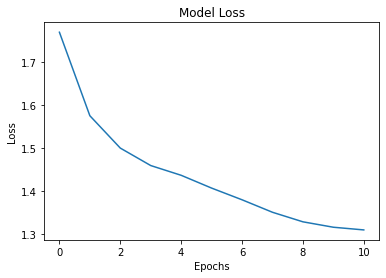

In [7]:
#plot the training loss
plt.plot(history.history['loss'])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

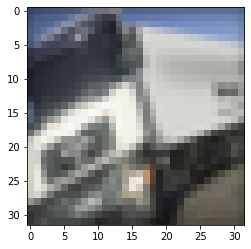

In [8]:
# Demo
class_names=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [9]:
pred=model.predict(xtest)
print("Target value :",class_names[int(ytest[n])])
print("Predicted value :",class_names[int(np.argmax(pred[n]))])

313/313 [==============================] - 3s 8ms/step
Target value : truck
Predicted value : automobile


In [10]:
# Use the trained model to predict probabilities for the test set
y_pred_probs = model.predict(xtest)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_probs, axis=1)

# Rest of the code remains the same
# Convert true labels to 1D array if needed
y_true = ytest.flatten()

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)

# Print the classification report
print(report)





313/313 [==============================] - 2s 8ms/step


AttributeError: 'Series' object has no attribute 'flatten'